<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Add_a_Gaussian_Noise(Kel1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-08ba904b5c4e>:3: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.kde import gaussian_kde


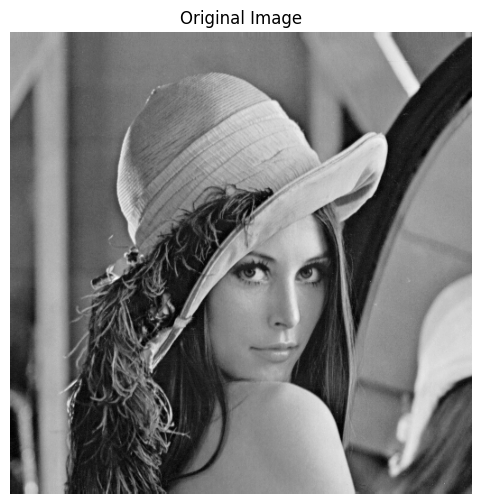

In [16]:
import cv2
import numpy as np
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")

f = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
f = f / 255

plt.figure(figsize=(6,6))
plt.imshow(f, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

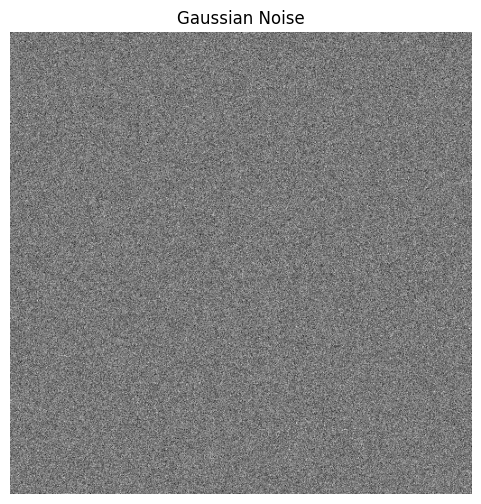

In [18]:
# Create Gaussian noise
x, y = f.shape
mean = 0
var = 0.01
sigma = np.sqrt(var)
n = np.random.normal(loc=mean, scale=sigma, size=(x, y))

# Display the Gaussian noise
plt.figure(figsize=(6,6))
plt.imshow(n, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')
plt.show()

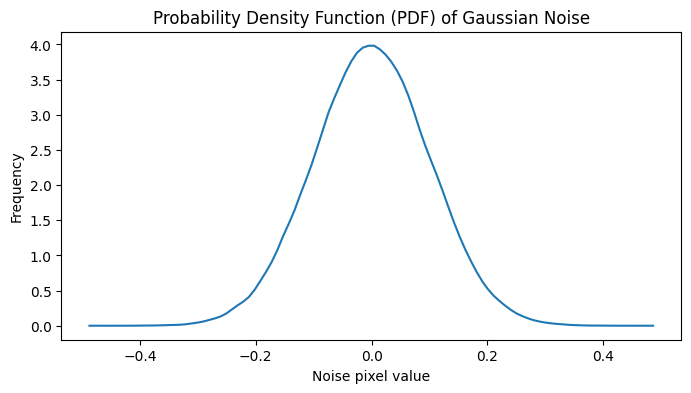

In [17]:
kde = gaussian_kde(n.reshape(int(x * y)))
dist_space = np.linspace(np.min(n), np.max(n), 100)
plt.figure(figsize=(8, 4))
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value')
plt.ylabel('Frequency')
plt.title('Probability Density Function (PDF) of Gaussian Noise')
plt.show()

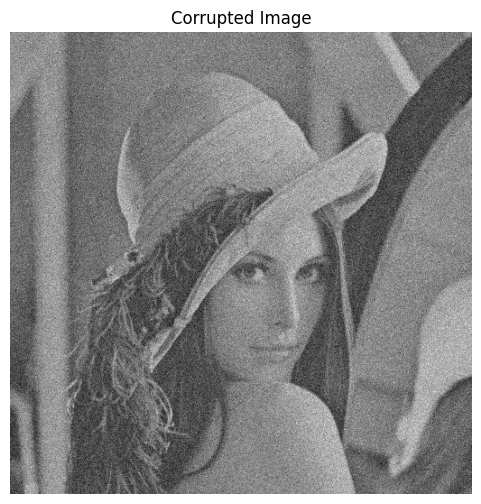

In [19]:
g = f + n
plt.figure(figsize=(6,6))
plt.imshow(g, cmap='gray')
plt.title('Corrupted Image')
plt.axis('off')
plt.show()

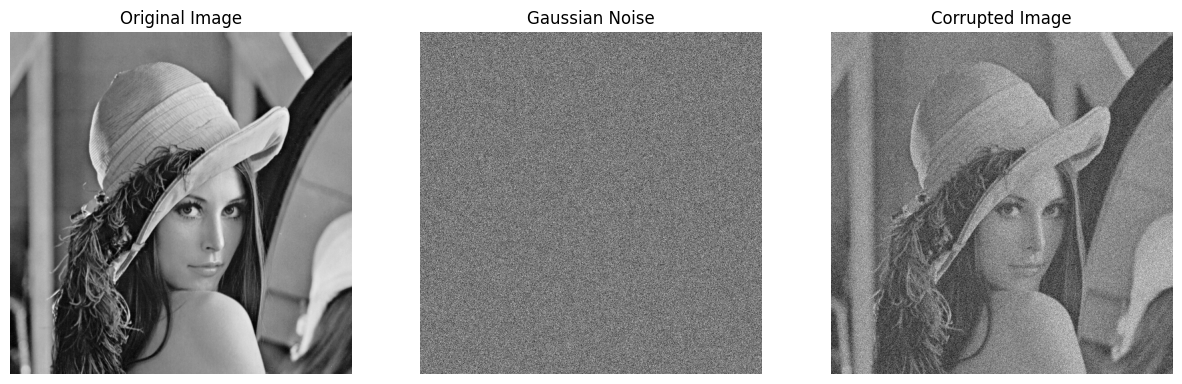

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(f, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(n, cmap='gray')
axs[1].set_title('Gaussian Noise')
axs[1].axis('off')

axs[2].imshow(g, cmap='gray')
axs[2].set_title('Corrupted Image')
axs[2].axis('off')

plt.show()